========================================================================================================================
# Getting started
In this section, we will cover:
* Importing the packages we need,
* Importing the data we will use,
* Checking the data in 2 different ways. 


***
## Importing packages
To start with we need to import any packages beyond base Python we are using.
* Numpy - Support large multi-dimension arrays.
* Pandas - Pythons data manipulation library, built on top of numpy.
* Faker - Generates fake data.
* Matplotlib - configure plots, and pandas plotting

In [1]:
# Needed to make the output of some cells cleaner and less confusing
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

# Needed for looking at the contents of folders and identifying files available to read in
import os

# Basic packackes for importing and working with data 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Do I need these for this demo?
!pip install Faker
from faker import Faker

# Needed for plotting and visualiasations
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

!pip install seaborn
import seaborn as sns

# Needed for estimating best fit to common distributions
!pip install fitter
import fitter
from fitter import Fitter, get_common_distributions, get_distributions

# Needed for building a model of the existing dataset
from sklearn.linear_model import LinearRegression


***
## Importing data
Next we need to import the data with which we are going to work. This is a pretty basic dataset that is often included with python distributions. 

Still, I wanted to demonstrate how you load your own dataset from a file. In this case, the file is located inside a folder called 'input' which is stored in the same place as my jupyter notebook (the .ipynb file that you clicked on to open this tab). 

Importing the file into the jupyter notebook also gives us a chance to name it, in this case `df`. This is a common name given to a dataset for demonstration purposes because it is just short for 'data frame'. In a real-world project, you should give your datasets more useful, descriptive names. 

In [97]:
print(os.listdir("input"))                    # This prints the contents of the "inputs" folder 
                                              # as a quick check that we have something to import
    
df= pd.read_csv('input/weight-height.csv')    # read in the .csv as a variable called "df"

['weight-height.csv']


***
## Checking the data
Quickly "sense check" the data we just imported. There are a few different ways to do that and I show you two here. 


The first way is to simply type the name of the data into a cell and execute that cell. This gives you the first and last five lines of the data and a summary of how many rows and columns. 

In [ ]:
df                                            # check the new variable by simply calling its name.

A second way to sense check the data is to call for the `head` of the file, which is the first X number of rows. Exactly how many rows are returned in the head of the file depends on the value of X you want. I use X=10 in the  example below. 

You should also note that the summary (how many rows and columns) is not provided at the end as it was in the first way to sense check. This doesn't matter much here for two reasons:
* You already know that information from the first sense check we ran.
* You can directly see that there are three columns because these three columns are easily seen on screen. 

This might matter more if you use `name.head(X)` as the first way to sense check the data or if you have too many columns in your data to fit on the screen. 

In [ ]:
df.head(10)                                  # calling "data_variable.head(X)" prints the first X rows in the data_variable


***
Extra credit work
***

Try running the `head` function with a number other than 10 in the code cell below. You can also try running the `tail function`. You will need to edit the code below to get it to run correctly. 

In [ ]:
df.head(X)                                  # Try changing the value of X. 
df.tail(X)                                  # What do you think 'tail' will do? Try it out!


# NOTE! This cell will produce an error if you try to run it as it was originally written. 
# What do you need to change to make it run correctly?

===========================================================================================================================
# Exploring the data
In this section, we will cover:
* Multiple ways to get an overview, and
* How to visualise the data.

The first way to visualise the data is to have a look at the columns with a simple `name.columns` function. This tells you things like how many there are and what they are called. It is pretty basic but also pleasantly straightforward. 

In [ ]:
df.columns

Another option is to use `name.info()`. This returns lots more info (the clue is in the name) like what kind of an object the thing on which you called `info` is, how many entries it has, what their index range is, how many columns, what the column names are, whether there are missing values in those columns, what type of data each column is, how much memory is used, etc. 

In [ ]:
df.info()

Having used these overview options, we know:
* we have three columns (and we know the names),
* we have 1000 rows, 
* there are no missing values, and
* there are 2 different types (1 object and 2 floats). 

***
## Data overviews

Now that we have a basic sense of what our data is (how big it is, what is in it, etc.) we need to have a look at its *contents*. As you might expect, there are a few ways to do this, each of which is slightly different. 

The first way is to use `name.describe()` which returns some basic descriptiove statistics for the numerical variables (not for 'gender' which is an object variable). In essence, this is the count, minimum, maximum, mean, etc. 

In [19]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


You can also get a description for subsets of the data instead of for the entire data set by using the `groupby` function. 

In [22]:
df.groupby("Gender").describe()

Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              Weight                                     \
              75%        max   count        mean        std         min   
Gender                                                                    
Female  65.563565  73.389586  5000.0  135.860093  19.022468   64.700127   
Male    70.988744  78.998742  5000.0  187.020621  19.781155  112.902939   

                                                        
               25%         50%         75%         max  
Gender                                                  
Female  122.934096  136.117583  148.810926  202.237214  
Male    173.887767  187.033546  200.357802  269.989699

The fact that the non-numerical variable is excluded means we need another way to describe it. A useful function for categorical variables, such as gender, would be to use `name.variable.value_counts()`. 

In [ ]:
df.Gender.value_counts()

The `value_counts` function is a useful ways to see how many of each value we have for the specified variable. For the case of gender, we have an even distribution between 'Female' and 'Male'. Not surprising, although we may see more 'Non-binary', 'Third gender', or 'Other' in the future. 

***
Extra credit work
***

Why don't you try running the `value_counts()` function out on one of the other variables,like 'Height' or 'Weight'? You can do that in the code cell below, but you will need to edit the code before running it to get it to run correctly. 

In [ ]:
df.variable_name.value_counts()               # Try counting the values of other fields. Are they all unique?

# NOTE! This cell will produce an error if you try to run it as it is now. What do you need to do to make it run correctly?

 You may find that trying the `value_count` function on 'Height' or 'Weight' was not as useful as it was for 'Gender'.
 
 This is because, as a field with potentially infitine values, none are repeated. It is useful to remember that the type and expected values of a column are useful when thinking about what descriptives you might want to run. 

***
## Visualizations

Descriptive statistics are super useful, but sometimes you just want to *look at the data* to get a better understanding. 
That is where visualizations come in!

A classic way to visualise a relationship between two continuous variables is to get a scatterplot. 

<AxesSubplot:xlabel='Height', ylabel='Weight'>

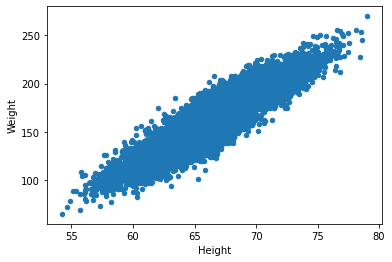

In [3]:
df.plot.scatter(x = 'Height', y = 'Weight')         # a basic scatter plot of height and weight using matplotlib

However, we have **3** variables, not just two, so lets modify that scatterplot to colour each plotted point by 'Gender'. 

In [ ]:
plt.scatter(df.Height,df.Weight, c = pd.Categorical(df.Gender).codes) # a scatter plot of height X weight using matplotlib
                                                                      # this time colour coded by gender

This is great for preliminary "getting a sense of what is in the data" sort of work, but there are lots of things we could add that would make the plot better if we were to publish it somewhere. For example, we could:
* change the size if we wanted it to be clearer
* change the colours to be colour-blind friendly
* add titles and axis labels
* add one or more lines of best fit to clarify the trends in the data. 

These are all things you can add to plots to be fancy. I won't show you how here, I just wanted you to know it can be done.

The visualisations show:
* clear correlation between height and weight
* clear differences between the two genders

There may even be different correlations between height and weight for each gender? It is hard to say from these preliminary visualisations, but these kind of patterns have some implications for our synthetic data. So let's look at the distributions!

***
Extra credit work
***
The visualisations above use `matplotlib`, which is a very common package. Another package that we imported is `seaborn` and when we imported this package we gave it the nickname of `sns`. You can sea this nickname in the next two code cells because we type `sns.scatterplot` to run the scatterplot function in `sns`. 

You don't necessarily need to know how to make scatterplots (or any kind of plot) in more than one package, but it may be useful to see examples. In this way, you can get used to the way each one works, how the arguments must be listed, what else is printed along with the visualisation, etc. 

For example, in the cell below to create the basic scatterplot in `sns`, the data to use is specified only by including `df` as the first argument (the first thing inside the `( )` after the function name). 
The following cell creates the colour-coded-by-gender scatterplot in `sns` and in this one you see the first argument is written as `(data=df`. 

If you want to understand this better, try reorganising the arguments (for example, so that `X=` comes first). Does it work? Does it matter if you use `df` or `data=df` when you reorganise the arguments? 

<AxesSubplot:xlabel='Height', ylabel='Weight'>

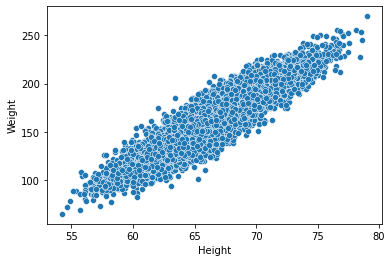

In [10]:
sns.scatterplot(df, x="Height", y="Weight")

<AxesSubplot:xlabel='Height', ylabel='Weight'>

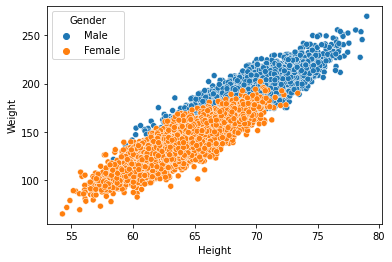

In [9]:
sns.scatterplot(data=df, x="Height", y="Weight", hue="Gender")

===========================================================================================================================
## Distributions

The correlations we saw in the scatterplots suggest we ought to look at distributions for each variable. We don't need to see the distributions for Gender, since we know there are exactly 500 of each. 

Let's start with looking at Height, using 30 bins. 

In [ ]:
plt.hist(df.Height, bins=30)


This is probably about what you might expect. Not so many super short or super tall people with most people in the middle and a clear "bell-shaped" distribution. 

But does the number of bins matter? Have a play around here to see what other height histograms look like. 

In [ ]:
plt.hist(df.Height, bins=X)


Now, what about weight? Let's do a basic histogram with 30 bins. 

In [ ]:
plt.hist(df.Weight, bins=30)


Uh oh. This is no longer so clear cut. Instead, it looks like weight is creating a bimodal distribution. Almost certainly, this relates to the differences between males and females. Let's dive in deeper. 

In [ ]:
df_males = df[df['Gender']=='Male']        # This creates a subset of the data with only the rows where gender = male
df_females = df[df['Gender']=='Female']    # And another with only the rows where gender = female


plt.hist(df_males['Height'],               # Creating a historgam of the male-only dataset
         alpha=0.5,                        # that will appear at 50% transaparency, 
         label='Male')                     # and that has a 'Male' label in the legend.
plt.hist(df_females['Height'],             # Repeat for the female-only dataset.
         alpha=0.5,                        
         label='Female')
plt.legend(loc='upper right')                    # This tells matplotlib where to put the legend.
plt.title('Male and female height histograms')   # And gives a title for good measure.
plt.show()                                       # Finally, the command to show the plot. 
                                                 # Previously, this extra command was not needed. 
                                                 # But all the extra layers of date make this plot more complicated. 

Useful! We can clearly see that, despite our earlier bell-shaped histogram for height, gender does matter and we actually have a bimodal distribution, with each being roughly bell-shaped. 

What about weight? We already have subsets of male and female-only data, so lets just plot those onto a histogram of weight. 

In [ ]:
plt.hist(df_males['Weight'],               # Creating a historgam of the male-only dataset
         alpha=0.5,                        # that will appear at 50% transaparency, 
         label='Male')                     # and that has a 'Male' label in the legend.
plt.hist(df_females['Weight'],             # Repeat for the female-only dataset.
         alpha=0.5,                        
         label='Female')
plt.legend(loc='upper right')                    # This tells matplotlib where to put the legend.
plt.title('Male and female weight histograms')   # And gives a title for good measure.
plt.show()                                       # Finally, the command to show the plot. 
                                                 # Previously, this extra command was not needed. 
                                                 # But all the extra layers of date make this plot more complicated. 

Again, it is clear that weight is roughly bell-shaped, but clearly bimodal by gender. 

But "bell-shaped" is not really specific, is it? Let's see what distribution is the best fit for our data. For this, we use the `fitter` package that we installed earlier. Let's start by getting a list of the 10 most common distributions. 
              

In [ ]:
get_common_distributions()

Let's compare the males height distribution to these common distributions to see which is the closest match. 

First, for each distribution of interest (male height, male weight, female height, and female weight) we create a `Fitter` object that takes two variables - the data to fit and the distributions against which that data should be fit. 

For the ease of working with these four `Fitter` variables, I popped them all into a list. 

In [ ]:
f_males_height = Fitter(df_males.Height, distributions= get_common_distributions())
f_males_weight = Fitter(df_males.Weight, distributions= get_common_distributions())
f_females_height = Fitter(df_males.Height, distributions= get_common_distributions())
f_females_weight = Fitter(df_males.Weight, distributions= get_common_distributions())

distribution_list = [f_males_height, f_males_weight, f_females_height, f_females_weight]

Next, I create an empty list called `best_fit_distribution` and then run a `for` loop on each `Fitter` item in my distribution list and
* identifies the fits listed within that `Fitter` object, 
* finds the best of those fits (according to the least sum of squares method - other methods are available) 
* and appends the best fit identified to the previously created empty list. 

Then I print the list. 

In [ ]:
best_fit_distribution = []

for distribution in distribution_list:
    distribution.fit()
    best = distribution.get_best(method = 'sumsquare_error')
    best_fit_distribution.append(best)

best_fit_distribution

This shows that for all the variables, the best fit is a 'normal' distribution. That's great! We can use that!

=========================================================================================================================
# Creating synthetic data 

Now that we have reasonable idea of what our data *looks like* we can get started making synthetic versions of it. 
***
## Low fidelity options

Remember that **low fidelity** data does not look very much like the real data. Next, we create 3 low-fidelity synthetic versions of our data. 
* The lowest fidelity version is essentially random numbers for all three variables. 
* The lowish fidelity version is random integers within loosely approximated bounds as the minimum and maximum values are set. 
* The low fidelity version is random integers for the numerical variables within minimum an d maximum values determined by the min and max from the real data. Further, `Gender` is composed of 'Male' and 'Female' (instead of numbers) with an even 50-50 distribution. 

***

Let's start with the lowest fidelity version. To do this, we:
* create a `pandas` data frame (when we imported pandas,  we assigned it the nickname `pd` to make running `pandas` commands a bit faster) and assign it the name `lowest_fidelity`, 
* Within that data frame, we create 3 random `numpy` arrays (`numpy` is also imported with the nickname `np` to make it faster). Each of these arrays is 100 digits long, and
* we assign the names 'Gender', 'Height' and 'Weight' to the three columns made out of random number arrays. 

After creating it, we inspect the new data frame by calling its name. 

In [ ]:
lowest_fidelity = pd.DataFrame(np.random.randn(100, 3), 
                               columns=('Gender','Height', 'Weight'))
lowest_fidelity

Having inspected the data frame, we can get a quick view of it by creating a scatterplot using the same basic code we used before, but this time making sure to refer to the newly created `lowest_fidelity` data frame instead of the real data that we had imported. 

We can see that it is clearly a lot of nonsense. A negative weight or height is impossible. Further, there are a lot of digits after the decimal point which seems like unecessary precision for this kind of task. 

In [ ]:
plt.scatter(lowest_fidelity.Height,lowest_fidelity.Weight, c = pd.Categorical(lowest_fidelity.Gender).codes)

***
Extra credit work
***

Try modifying and running the code cell below to create another data frame from random numbers. You will need to edit the code below to make it run correctly. 

In [ ]:
extra_credit_very_random = pd.DataFrame(np.random.randn(NumberOfRows, NumberOfColumns), 
                                        columns=('ColumnName1','ColumnName2', 'ColumnNameN))
extra_credit_very_random
                                                 
                                # NOTE! This cell will produce an error if you try to run it as it was originally written. 
                                # What do you need to change to make it run correctly?

***
Now, let's move on to a low-but-not-quite-as-low fidelity version. To do this, we:
* create another `pandas` data frame (named `lowish_fidelity`) in a very similar way, 
* still with 3 random `numpy` arrays that are 100 digits long but this time with a range of 0 to 100 specified), and
* still assigned the column names 'Gender', 'Height' and 'Weight'. 

After creating it, we inspect the new data frame by calling its name. 

In [ ]:
lowish_fidelity = pd.DataFrame(np.random.randint(0,100,size=(100, 3)), 
                               columns=('Gender','Height', 'Weight'))
lowish_fidelity

If you look closely at the code for the `lowest_fidelity` and `lowish_fidelity` data frames, you see the only difference is in the `numpy` arrays. 

The first data frame has `np.random.randn(100, 3)` while the second has `np.random.randint(0,100,size=(100, 3)`. 

The key differences areA
* the first has `randn` in front of the parentheses while the second has `randint`. This is what switches from numbers (with so many precise digits after the decimal point) to integers (with no decimal points). 
* the second has `0,100` at the begining of the parentheses. This is what sets the range from which the random integers should be drawn. 

Again, let's create a quick scatterplot to see how it looks. 

There are still problems (like how gender is a random integer between 0 and 100) but at least none of the values are negative!

In [ ]:
plt.scatter(lowish_fidelity.Height,lowish_fidelity.Weight, c = pd.Categorical(lowish_fidelity.Gender).codes)

***
Extra credit work
***

Try modifying and running the code cell below to create another data frame from random integers, but this time set the ranges in a place of your choosing. . You will need to edit the code below to make it run correctly. 

In [ ]:
Extra_credit_less_random = pd.DataFrame(np.random.randint(MinimumOfYourChoice,MaximumOfYourChoice,size=(100, 3)), 
                               columns=('Gender','Height', 'Weight'))
Extra_credit_less_random

                                # NOTE! This cell will produce an error if you try to run it as it was originally written. 
                                # What do you need to change to make it run correctly?

***
Now, let's move on to the least-low fidelity version. To do this, we:
* create another `pandas` data frame (named `low_fidelity_h_w`), 
* but now with only two columns of 100 random values for the height and weight, but this time drawing from a uniform distribution and with the min and max set according to the exploration we did earlier, 
* one column of 50 'Male and 50 'Female', 
* still assigned the column names 'Gender', 'Height' and 'Weight', but this time assigning the column names as the columns are created to make sure they match the column contents (e.g. the `Height` column is created with the min and max for height rather than weight, etc.). 

After creating it, we inspect the new data frame by calling its name. 


In [11]:
low_fidelity_h_w = {"Height": np.random.uniform(low=54, high=78, size=(100,)),
                    "Weight": np.random.uniform(low=64, high=269, size=(100,)),
                    "Gender": (['Male'] * 50) + (['Female'] * 50)}
low_fidelity = pd.DataFrame(low_fidelity_h_w)
low_fidelity

,Height,Weight,Gender
0,71.519855,199.344670,Male
1,74.934589,208.750845,Male
2,75.501498,74.427623,Male
3,57.788192,133.276300,Male
4,75.572390,139.313335,Male
...,...,...,...
95,66.340856,235.414354,Female
96,70.439989,264.392643,Female
97,56.609145,235.312633,Female
98,69.563985,74.656764,Female


Again, we have a quick look at a scatterplot for our data. Since it is much less random (due to the sensible min and max values we set and the categorical values for Gender) it looks much better. It still does not have the right distributions or correlations between min and max, but we are getting closer. 

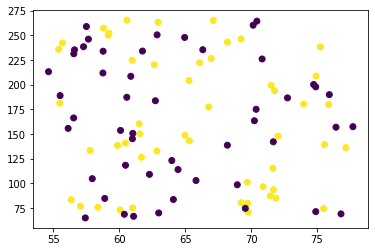

In [14]:
plt.scatter(low_fidelity.Height,low_fidelity.Weight, c = pd.Categorical(low_fidelity.Gender).codes)

========================================================================================================================
## Mid-fidelity data

Put text here

In [171]:
df_numerical = df
df_numerical['Gender'].replace('Female',0, inplace=True)
df_numerical['Gender'].replace('Male',1, inplace=True)
df_numerical


,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [172]:
height_array = df_numerical.iloc[:, :-1].values
weight_array = df_numerical.iloc[:, 2].values



In [173]:
model = LinearRegression().fit(height_array, weight_array)

model.score(height_array, weight_array)


0.9027481729220092

In [174]:
h_mean = df["Height"].mean()
h_std = df["Height"].std()


In [177]:
med_fidelity = {"Gender": ([0] * 50) + ([1] * 50),
                       "Height": np.random.normal(h_mean, h_std, 100),
                     "Weight":('null')}

med_fidelity = pd.DataFrame(med_fidelity)
med_fidelity

,Gender,Height,Weight
0,0,63.126907,null
1,0,68.856795,null
2,0,66.355285,null
3,0,68.567326,null
4,0,67.518758,null
...,...,...,...
95,1,67.529939,null
96,1,64.529342,null
97,1,65.739053,null
98,1,65.796444,null


In [180]:
for ind in med_fidelity.index:
    current_pred = model.predict([[med_fidelity['Gender'][ind], med_fidelity['Height'][ind]]])
    med_fidelity['Weight'][ind] = (current_pred[0])
    

med_fidelity

,Gender,Height,Weight
0,0,63.126907,132.382309
1,0,68.856795,166.629513
2,0,66.355285,151.678136
3,0,68.567326,164.899372
4,0,67.518758,158.632145
...,...,...,...
95,1,67.529939,178.076682
96,1,64.529342,160.14229
97,1,65.739053,167.372666
98,1,65.796444,167.715685


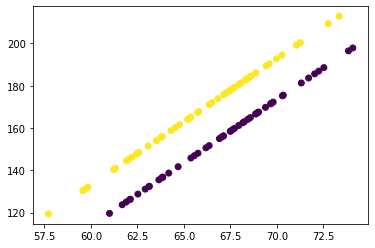

In [181]:
plt.scatter(med_fidelity.Height, med_fidelity.Weight, c = pd.Categorical(med_fidelity.Gender).codes)